Import relevant packages.

In [3]:
from wordcloud import WordCloud
from wordcloud import ImageColorGenerator
from wordcloud import STOPWORDS
import matplotlib.pyplot as plt
import pandas as pd

Read all csvs to a dataframe. There are seven csv files, one for each date from 20 Nov to 27 Nov

In [4]:
dataframe = {}

for date in range(20, 28):
    file = "data/" + str(date) +"_nov_archive.csv"
    df = pd.read_csv(file)
    key = str("df_" + str(date) + "_nov")
    dataframe[key] = df

In [9]:
print(dataframe["df_21_nov"])

                    id_str        from_user  \
0      1594843092896579584     CarlosEllery   
1      1594843092858949634    outlawstang23   
2      1594843087540469761  MelchorAsturias   
3      1594843085221122048       rigles1201   
4      1594843083904061442       CaronaCali   
...                    ...              ...   
11444  1594809918347182083    jennifers1968   
11445  1594809900278116353  DavidJo76233922   
11446  1594809894871375880  SusanMy21462756   
11447  1594809887875276827     GeurtdewitDe   
11448  1594809887048998922       wldpatriot   

                                                    text  \
0      RT @nypost: CBS 'confirms' Hunter Biden laptop...   
1      RT @thebradfordfile: You have got to be kiddin...   
2      RT @FoxNews: CBS News verifies Hunter Biden’s ...   
3      RT @pjampaganza: Republicans rush to investiga...   
4      RT @thebradfordfile: You have got to be kiddin...   
...                                                  ...   
11444  RT @RonF

To get rid of spam, only the data with tweets from accounts with at least 50 followers is kept. 

In [8]:
for date in dataframe:
    dataframe[date] = dataframe[date][dataframe[date]["user_followers_count"] > 49] 

In [17]:
print(dataframe["df_26_nov"]["user_followers_count"].head(40))

2      9017.0
3       963.0
4       259.0
6      1237.0
7      6272.0
8      1228.0
10      519.0
12      106.0
14      106.0
15      443.0
16     1479.0
17      278.0
18      211.0
19      523.0
20     2851.0
21    13056.0
22      118.0
23      463.0
24     1366.0
26     1526.0
28      137.0
29      677.0
31       71.0
32      130.0
33     2177.0
34     1101.0
36      492.0
39      139.0
40       53.0
41     1562.0
42     2031.0
43    21213.0
44      490.0
48     1403.0
51      771.0
52     1280.0
53       96.0
54    14763.0
55     1076.0
56     3761.0
Name: user_followers_count, dtype: float64


Visualise the column in the dataframe that contain the text of the tweets. Add the 'RT' to the list of words to not include it in the wordcloud since all retweets have that at the start of the text. Also exclude 'Hunter Biden laptop' as all tweets would have that term as that was the condition.

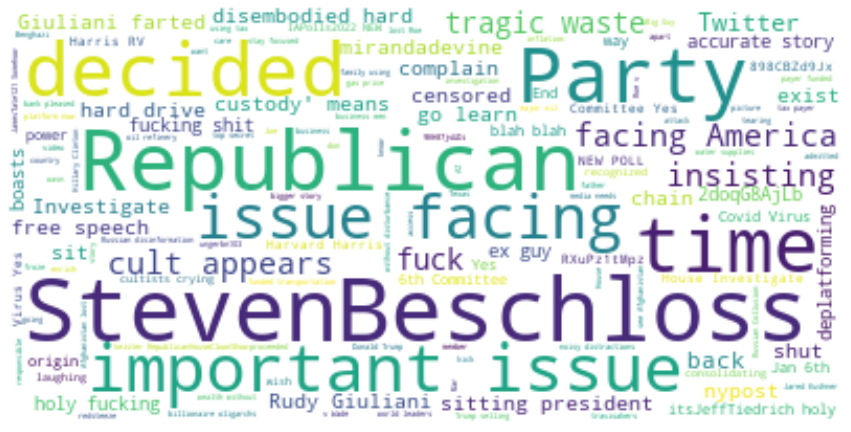

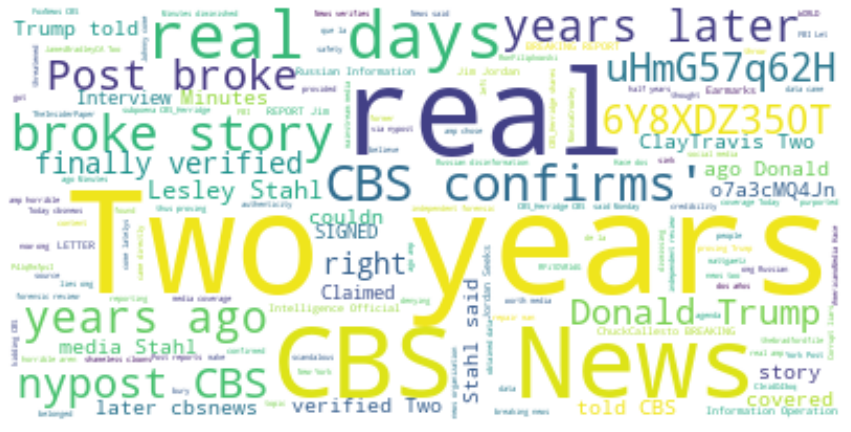

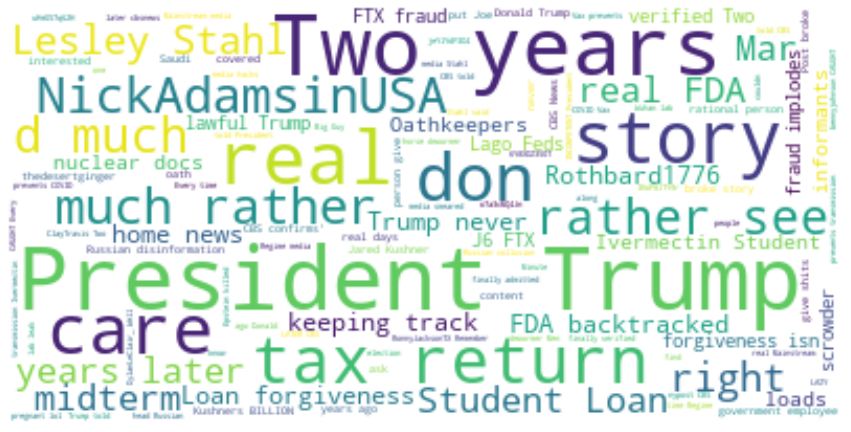

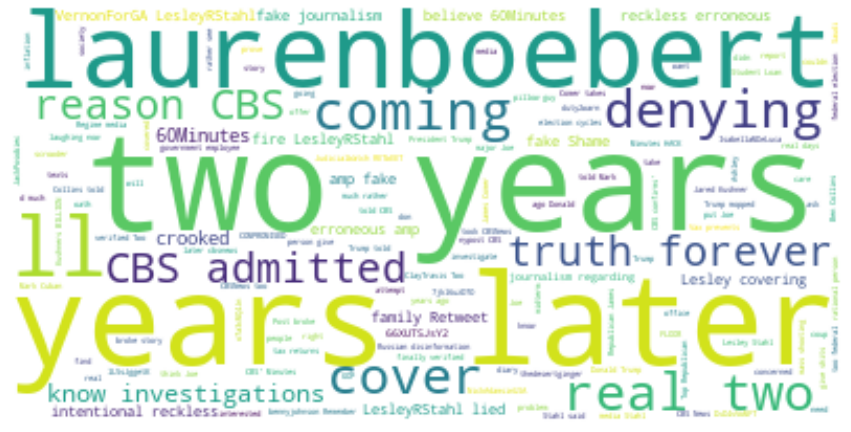

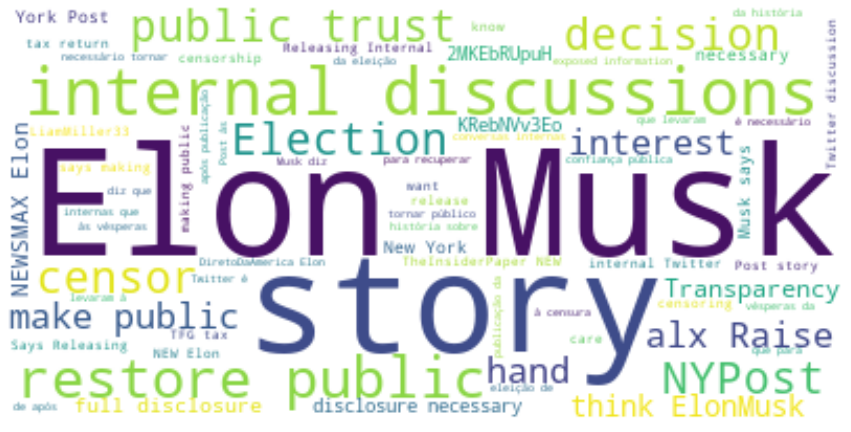

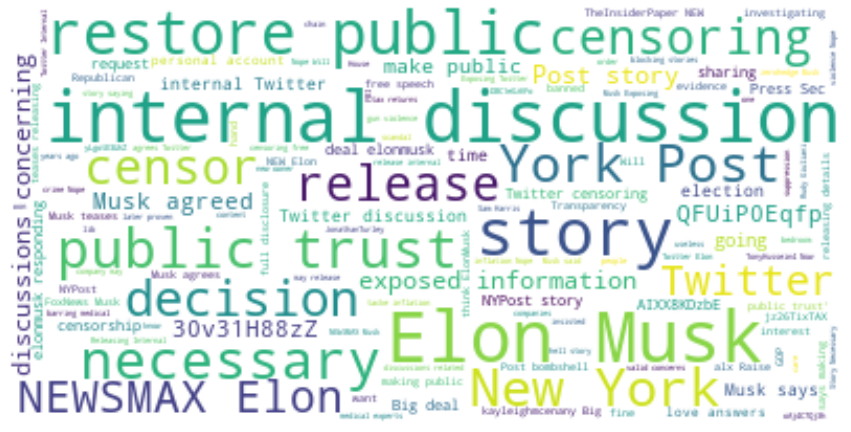

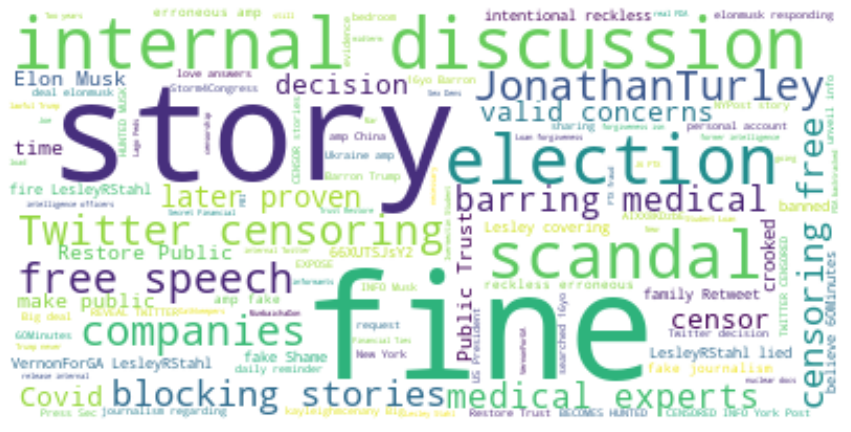

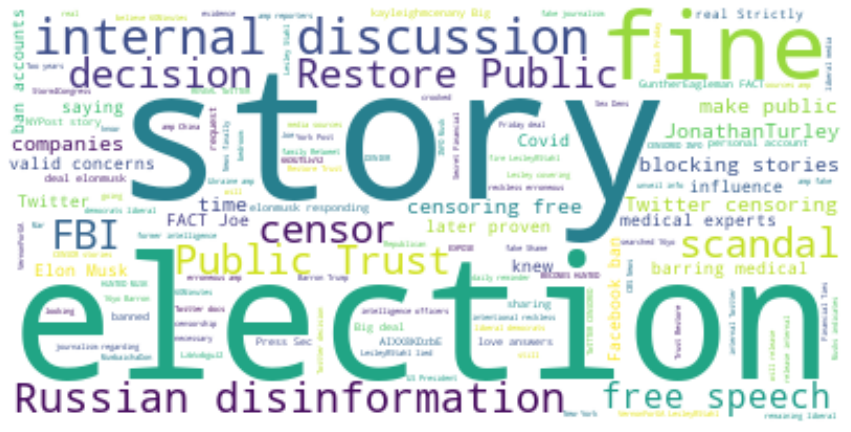

In [55]:
def gen_wordcloud(date, filename): 
    text = " ".join(i for i in date["text"])

    stopwords = set(STOPWORDS)
    stopwords.update(["RT", "Hunter", "Biden", "laptop", "https", "t", "co", "s"])

    wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)

    plt.figure(figsize=(15,10))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()
    wordcloud.to_file("wordclouds/" + filename + ".png")

for date in dataframe:
    gen_wordcloud(dataframe[date], date)